In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading data

In [3]:
data=pd.read_excel('E:\PAATSHAALA\Final_Project\data.xlsx')

In [4]:
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,TwoDoor Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,FourDoor Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,TwoDoor Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,FourDoor Car,Medsize


### EDA

In [5]:
data.shape

(9134, 24)

We have 9134 rows and 24 columns in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [7]:
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


Mean and Standard Deviation high at Customer Lifetime Value and Income fields.

In [8]:
data.isna().sum()

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

We don't have any missing values and dataset appears to be clean

<AxesSubplot:>

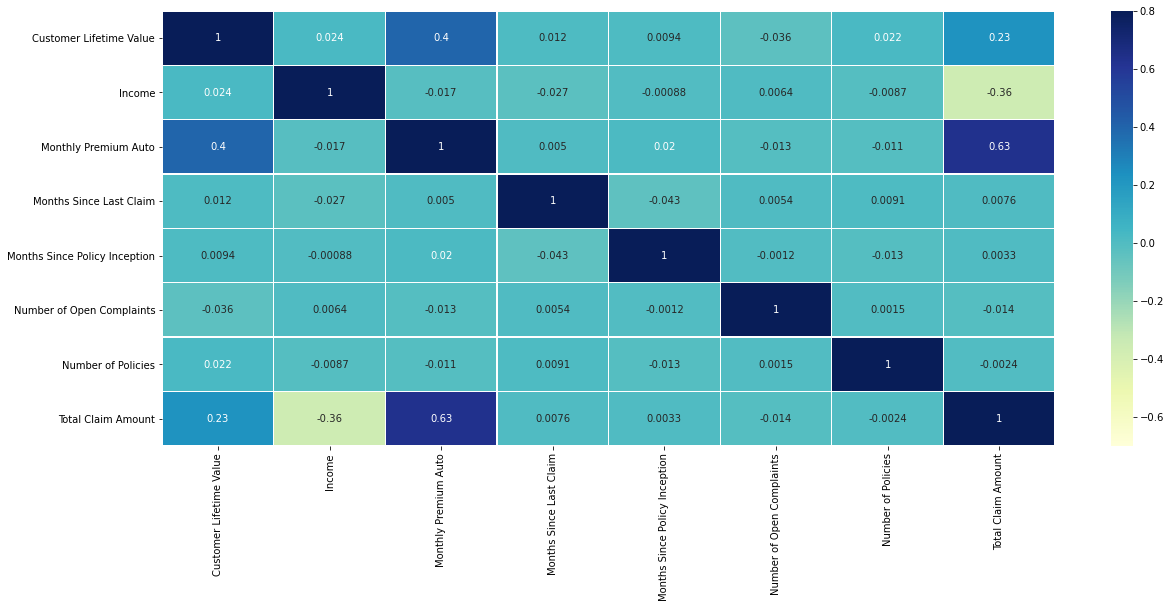

In [9]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-0.7,vmax=0.8,annot=True,linewidths=0.2,cmap='YlGnBu')

From the correlation matrix, Monthly Premium Auto and Total Claim Account are showing high correlations with each other and clv.
We could drop these two columns from the dataset

In [10]:
data.drop('Monthly Premium Auto',axis=1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,TwoDoor Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,FourDoor Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,TwoDoor Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,FourDoor Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-10-02 00:00:00,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,FourDoor Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-12-02 00:00:00,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,FourDoor Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-06-02 00:00:00,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,FourDoor Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-03-02 00:00:00,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,FourDoor Car,Large


In [11]:
data.drop('Total Claim Amount',axis=1)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,TwoDoor Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,FourDoor Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,TwoDoor Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-03-02 00:00:00,Employed,M,43836,...,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,FourDoor Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-10-02 00:00:00,Employed,M,71941,...,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,FourDoor Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-12-02 00:00:00,Employed,F,21604,...,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,FourDoor Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-06-02 00:00:00,Unemployed,M,0,...,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,FourDoor Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-03-02 00:00:00,Employed,M,21941,...,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,FourDoor Car,Large


In [12]:
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [13]:
list(data.select_dtypes(exclude=['object']).columns)

['Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

In [14]:
import warnings
warnings.filterwarnings("ignore")

### Income

<AxesSubplot:xlabel='Income'>

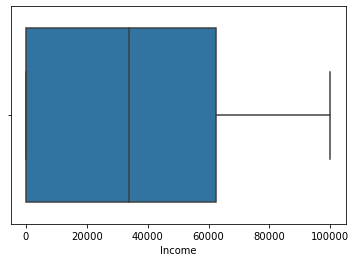

In [15]:
sns.boxplot(data['Income'])

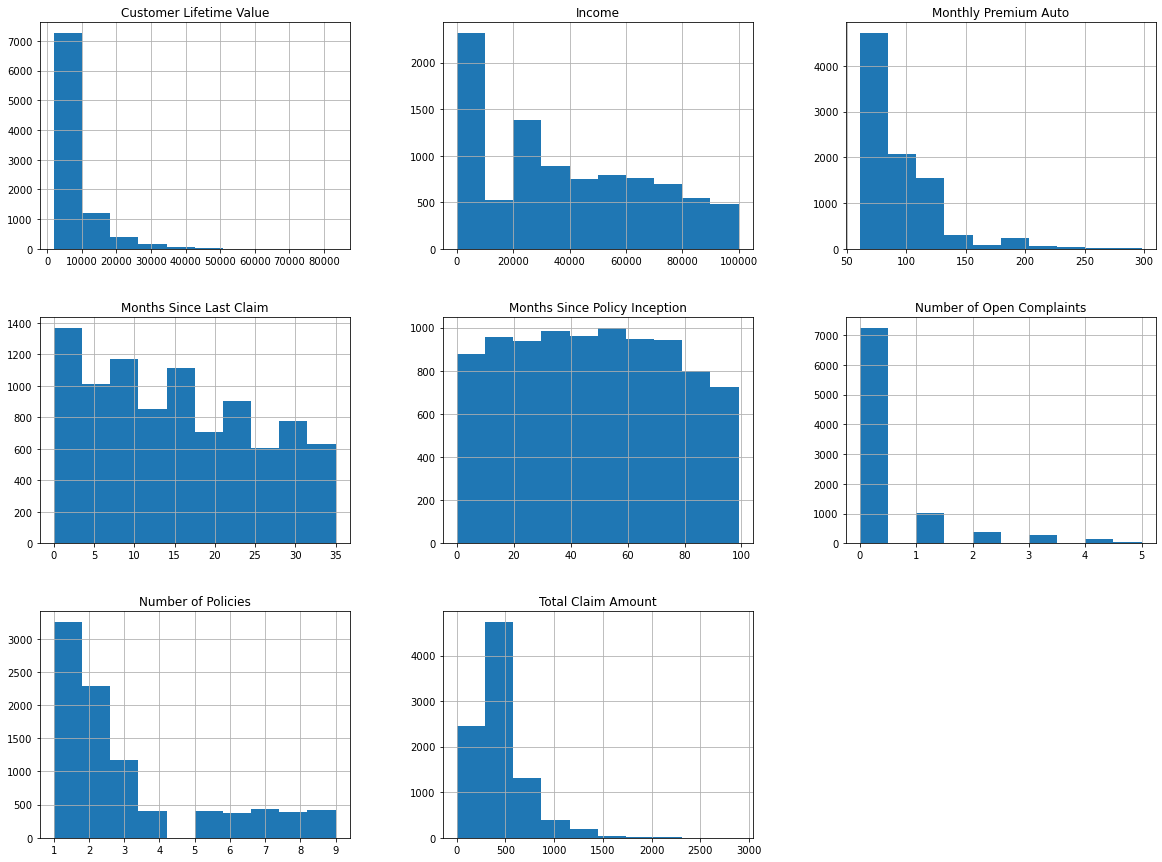

In [16]:
freqgraph=data.select_dtypes(include=['float64', 'int64'])
freqgraph.hist(figsize=(20,15))
plt.show()

### State Vs Income

Text(0, 0.5, 'Income')

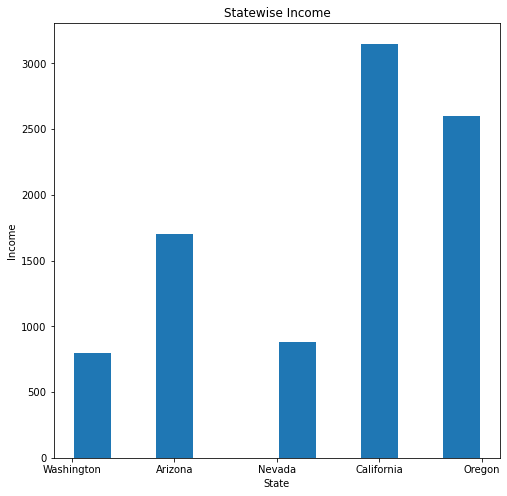

In [17]:
plt.figure(figsize=(8,8))
plt.hist(data['State'],rwidth=0.9)
plt.title('Statewise Income',)
plt.xlabel('State')
plt.ylabel('Income')

There are data for five states and among them, California marks the highest Income generation followed by Oregon and Arizona 
in second and third places.

### Vehicle class

Text(0, 0.5, 'Number of Policies')

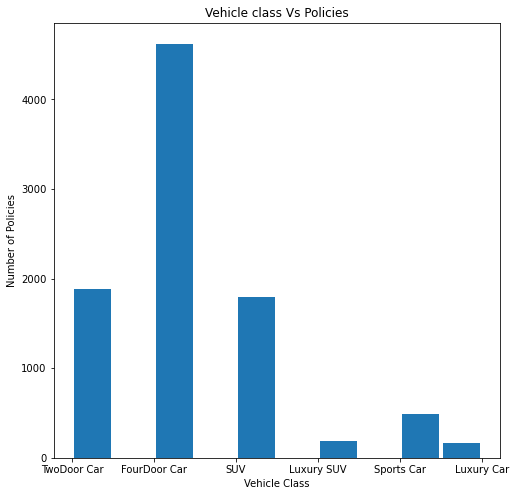

In [18]:
plt.figure(figsize=(8,8))
plt.hist(data['Vehicle Class'],rwidth=0.9)
plt.title('Vehicle class Vs Policies',)
plt.xlabel('Vehicle Class')
plt.ylabel('Number of Policies')

Four door cars top the list with maximum number of policies